In [1]:
import numpy as np
import scipy.linalg as lina
import pandas as pd
import matplotlib.pyplot as plt
import math
data = pd.read_csv('C:\\Users\\60474\\Desktop\\stockprices(2021).csv')
DJdata = data.iloc[:,1:31]
print(DJdata.columns)
DJdata.shape

Index(['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT'],
      dtype='object')


(252, 30)

In [2]:
#(a)
R = np.zeros([251,30])
for i in range(0,251):
    for j in range(0,30):
        R[i,j]=(DJdata.iloc[i+1,j]-DJdata.iloc[i,j])/DJdata.iloc[i,j]
SR = np.zeros([251,30])
for n in range(0,251):
    for j in range(0,30):
        SR[n,j] = (R[n,j]-np.mean(R[:,j]))/np.std(R[:,j])

In [3]:
x = SR
C = x.T.dot(x)                       
lam,v= lina.eig(C)                   
new_index = np.argsort(lam)[::-1]    
A = -v[:,new_index]                  
w = x.dot(A)                         

Text(0.5, 1.0, 'principle component 10')

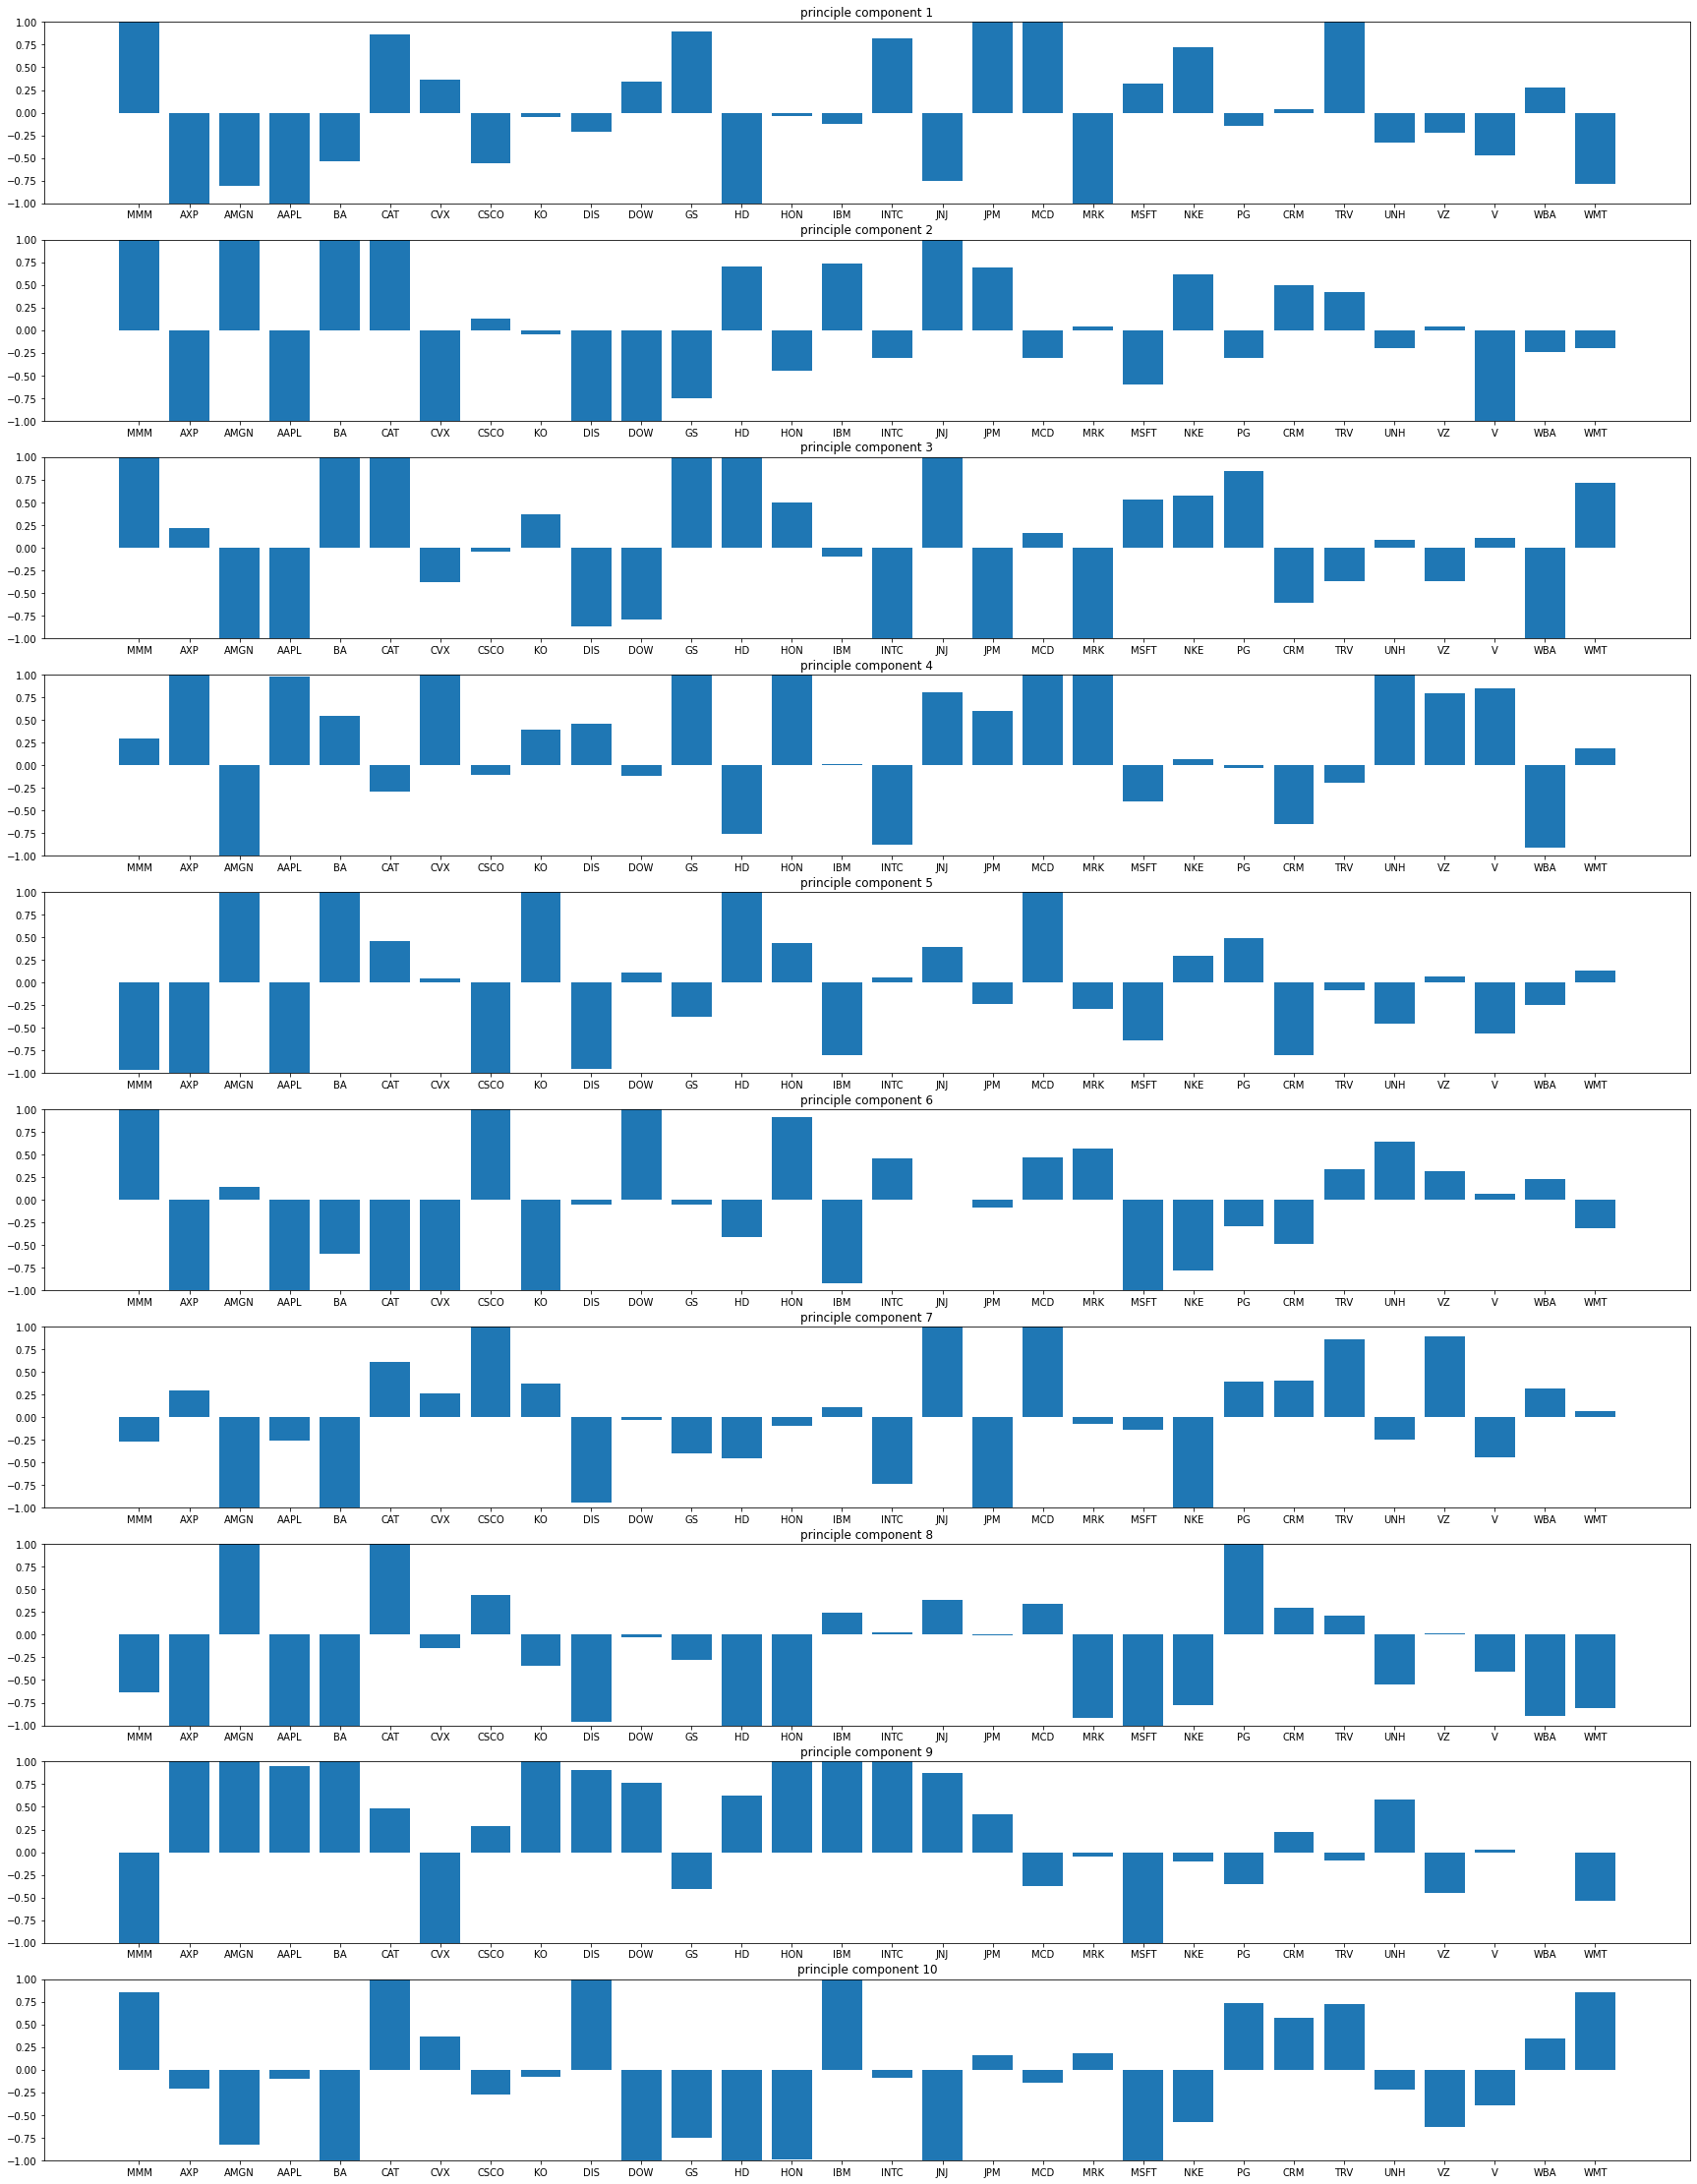

In [6]:
ticker=["MMM",'AXP','AMGN','AAPL','BA','CAT','CVX','CSCO','KO','DIS','DOW','GS','HD','HON','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PG','CRM','TRV','UNH','VZ','V','WBA','WMT']
plt.subplot(10, 1, 1)
plt.ylim(-1, 1)
plt.rcParams['figure.figsize'] = (20, 40.0)
plt.bar(ticker,w[0,:])
plt.title("principle component 1")
plt.subplot(10, 1, 2)
plt.ylim(-1, 1)
plt.bar(ticker,w[1,:])
plt.title("principle component 2")
plt.subplot(10, 1, 3)
plt.ylim(-1, 1)
plt.bar(ticker,w[2,:])
plt.title("principle component 3")
plt.subplot(10, 1, 4)
plt.ylim(-1, 1)
plt.bar(ticker,w[3,:])
plt.title("principle component 4")
plt.subplot(10, 1, 5)
plt.ylim(-1, 1)
plt.bar(ticker,w[4,:])
plt.title("principle component 5")
plt.subplot(10, 1, 6)
plt.ylim(-1, 1)
plt.bar(ticker,w[5,:])
plt.title("principle component 6")
plt.subplot(10, 1, 7)
plt.ylim(-1, 1)
plt.bar(ticker,w[6,:])
plt.title("principle component 7")
plt.subplot(10, 1, 8)
plt.ylim(-1, 1)
plt.bar(ticker,w[7,:])
plt.title("principle component 8")
plt.subplot(10, 1, 9)
plt.ylim(-1, 1)
plt.bar(ticker,w[8,:])
plt.title("principle component 9")
plt.subplot(10, 1, 10)
plt.ylim(-1, 1)
plt.bar(ticker,w[9,:])
plt.title("principle component 10")

In [5]:
#(b)
KMdata=data.iloc[:,1:504]
p = np.zeros([252,503])
r=np.zeros(503)
sigma=np.zeros(503)
for i in range (0,251):
    for j in range (0,503):
        p[i,j]=(KMdata.iloc[i+1,j]-KMdata.iloc[i,j])/KMdata.iloc[i,j]
        r[j] = np.mean(p[:,j])*252
        sigma[j] = np.std(p[:,j])*math.sqrt(252)
RSdata=np.zeros([503,2])
RSdata[:,0]=r
RSdata[:,1]=sigma
RSdata[0,0]

0.05036159792842661

In [7]:
def kmeans_xufive(ds, k):    
    m, n = ds.shape #m:the number of samples, n: the number of attribute values of each sample
    result = np.empty(m, dtype=np.int) # clustering results of M samples
    cores = ds[np.random.choice(np.arange(m), k, replace=False)] 
    # From m data samples, k samples are randomly selected as the centroid without repetition
    
    while True: # Iterative calculation
        d = np.square(np.repeat(ds, k, axis=0).reshape(m, k, n) - cores)
        distance = np.sqrt(np.sum(d, axis=2)) 
        # Ndarray (m, k), the distance between each sample and k centroids, with m rows in total
        index_min = np.argmin(distance, axis=1) # The nearest centroid index sequence number of each sample
        
        if (index_min == result).all(): # If the sample clustering does not change
            return result, cores # Then the clustering result and centroid data are returned
        
        result[:] = index_min # Reclassification
        for i in range(k): # Ergodic centroid set
            items = ds[result==i] # Find the sub sample set corresponding to the current centroid
            cores[i] = np.mean(items, axis=0) 
            # Take the mean value of the sub sample set as the position of the current centroid

In [8]:
var1=np.zeros(600)
for j in range(200):
    var=[]
    K=[6,8,10]
    for k in K:
        result, cores=kmeans_xufive(RSdata, k)
        sigma2=[]
        for i in range(k):
            a=sum(sum((RSdata[np.where(result==i),0]-cores[(i,0)])**2+(RSdata[np.where(result==i),1]-cores[(i,1)])**2))
            sigma2.append(a)
        a=sum(sigma2)
        var.append(a)
    var1[j]=var[0]
    var1[j+200]=var[1]
    var1[j+400]=var[2]
    
print(np.mean(var1[0:200]))
print(np.mean(var1[200:400]))
print(np.mean(var1[400:600]))

C:\Users\60474\AppData\Local\Temp/ipykernel_6496/2435826645.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.empty(m, dtype=np.int) # m个样本的聚类结果


5.052269172898757
3.7449210186339554
3.0175402645842255


In [9]:
incluvariance=[np.mean(var1[0:200]),np.mean(var1[200:400]),np.mean(var1[400:600])]
df=pd.DataFrame(index=[6,8,10],columns=["Variance"])
df.iloc[:,0]=incluvariance
df

,Variance
6,5.052269
8,3.744921
10,3.017540
